In this section we will be going over linear regression. We'll be going over how to use the scikit-learn
regression model, as well as how to train the regressor using the fit() method, and how to predict new
labels using the predict() method. We'll be analyzing a data set consisting of house prices in Boston.
We'll start off with a single variable linear regression using numpy and then move on to using scikit
learn. We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive
deeper into practical "hands-on" coding lessons.

If you're interested in the deeper mathematics of linear regression methods, check out the wiki page and
also check out Andrew Ng's wonderful lectures for free on youtube.

In this section we will be working through linear regression with the following steps:

Step 1: Getting and setting up the data

Step 2: Visualizing current data

Step 3: The mathematics behind the Least Squares Method

Step 4: Using Numpy for a Univariate Linear Regression

Step 5: Getting the error.

Step 6: Using scikit learn to implement a multivariate regression

Step 7: Using Training and Validation

Step 8: Predicting Prices

Step 9: Residual Plots

# Step 1: Getting and Setting Up the Data

We'll start by looking at an example of a dataset from scikit-learn.  First we'll import our usual data
analysis imports, then sklearn's built-in boston dataset.

In [1]:
# Grabbing our Data Analysis imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# Grabbing our Data Visualization imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

# Step 2: Visualizing Current Data

Text(0,0.5,'Number of houses')

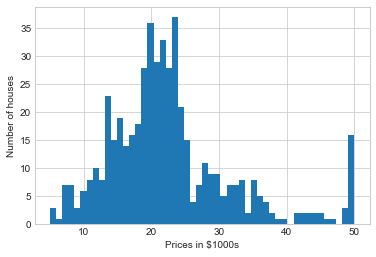

In [7]:
# A quick visualization of the data; Prices is the current 'target' or label of our dataset
# Plotting a histogram of the dataset
plt.hist(boston.target,bins=50)

# Defining your labels
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Avg median house price in thousands of dollars and the number of houses within that pricepoint

Text(0.5,0,'Number of rooms')

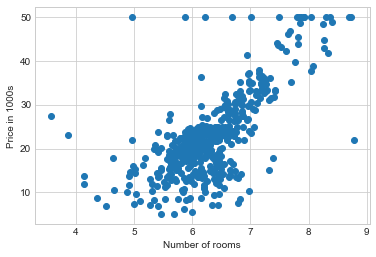

In [8]:
# Scatter plot of a single feature vs. the 'target' or label; 
# Here let's try the housing price vs. the # of rooms in the dwelling
plt.scatter(boston.data[:,5],boston.target)

# Putting in your labels
plt.ylabel('Price in 1000s')
plt.xlabel('Number of rooms')

Let's use Pandas to turn this boston dataset into a DataFrame and then use seaborn to perform an lmplot() on that dataframe to try and reproduce a similar scatter plot with a linear fit line

In [9]:
# Resetting the data as a Pandas DF
boston_df = DataFrame(boston.data)

# Setting the column names to be the dataset feature_names
boston_df.columns = boston.feature_names

boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Let's go ahead and add the target of the boston dataset, the price. 
# Add a new column to our dataframe, and set that equal to the target
boston_df['Price'] = boston.target

In [11]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


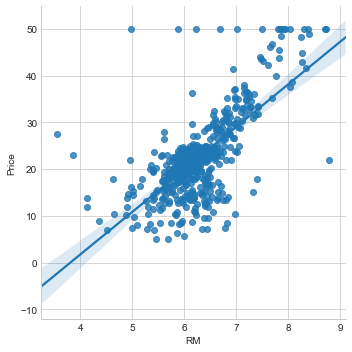

In [12]:
# Use seaborn's lmplot() to do a linear fit/linear regression automatically
sns.lmplot('RM','Price',data=boston_df)

However, we won't be able to do this when we move to more complicated regression models, so we'll stay
focused on using the scikit learn library

# Step 3: The Mathematics Behind the Least Squares Method

In this particular lecture we'll use the least squares method as the way to estimate the coefficients.
Here's a quick breakdown of how this method works mathematically: 

Take a quick look at the plot we created above using seaborn. Now consider each point, and know that 
they each have a coordinate in the form of (x,y). Now draw an imaginary line between each point and our
current "best-fit" line. We'll call the distance between each point and our current best-fit line, D. 
To get a quick image of what we're currently trying to visualize, take a look at the picture below:

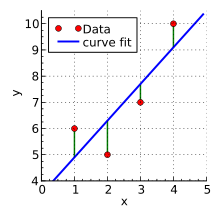

In [13]:
# Quick display of image from wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/' \
      '220px-Linear_least_squares_example2.svg.png'
Image(url)

Now as before, we're labeling each green line as having a distance D, and each red point as having a 
coordinate of (X,Y). Then we can define our best fit line as the line having the property were:
D21+D22+D23+D24+....+D2N
So how do we find this line? The least-square line approximating the set of points:

(X,Y)1,(X,Y)2,(X,Y)3,(X,Y)4,(X,Y)5,
has the equation:
Y=a0+a1X
this is basically just a rewritten form of the standard equation for a line:
Y=mx+b

We can solve for these constants a0 and a1 by simultaneously solving these equations:

ΣY = a0N + a1ΣX

ΣXY = a0ΣX + a1ΣX2

These are called the normal equations for the least squares line. There are further steps that can be 
taken in rearranging these equations to solve for y, but we'll let scikit-learn do the rest of the heavy lifting here. If you want further informatino on the mathematics of the above formulas, check out this 
great video.

For now, we'll use numpy to do a simple single variable linear regression. Afterwards we'll unleash the 
power of scikit learn to do a full multivariate linear regression.

# Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linear algebra library. We'll use this first for our 
Univariate regression and then move on to scikit learn for out Multi variate regression.

We will start by setting up the X and Y arrays for numpy to take in. An important note for the X array: 
Numpy expects a two-dimensional array, the first dimension is the different example values, and the 
second dimension is the attribute number. In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1. So we'll need to 
create a (506,1) shape array. There are a few ways to do this, but an easy way to do this is by using 
numpy's built-in vertical stack tool, vstack.

In [30]:
# Set up X as median room values
X = boston_df.RM

In [32]:
# Use vstack() to make X two-dimensional
X = np.vstack(boston_df.RM)

In [16]:
X.shape

(506, 1)

In [17]:
# Set up Y as the target price of the houses
Y = boston_df.Price

Now that we have our X and Y, let's go ahead and use numpy to create the single variable linear 
regression.

We know that a line has the equation:
y = mx + b
which we can rewrite using matrices:
y = Ap
where:
A = [x1] or in our dataset's case, X by 1: [506 rows,1 column]
and
p = [m/b]: where 'p' equals a matrice of m by b or 2 by 1.
This is the same as the first equation if you carry out the linear algebra. So we'll start by creating 
the A matrix using numpy. We'll do this by creating a matrix in the form [X 1], so we'll call every 
value in our original X using a list comprehension and then set up an array in the form [X 1]

In [18]:
# Create the X array in the form [X 1]
X = np.array([[value,1] for value in X])

In [19]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

Great! Now we can get the best fit values!

In [21]:
# Now get our m and b values  for our best fit line
# Setting up two objects, m and b. Use Numpy's linalg library, and its least squares method, lstq
m, b = np.linalg.lstsq(X,Y,rcond=None)[0]

Finally let's plot it all together! Note that we use the original format of the boston information. We 
only did our matrix transformations to utilize the numpy least square method.

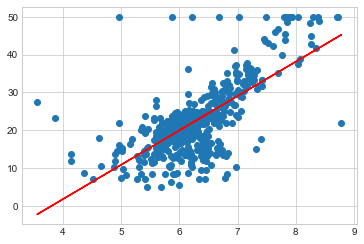

In [27]:
# First the original points, Price vs. Avg Number of Rooms in a scatter plot
plt.plot(boston_df.RM,boston_df.Price,'o')

# Next the best fit line
x = boston_df.RM
plt.plot(x, m*x + b,'r',label='Best Fit Line')

# Step 5: Getting the Error

Great! We've just completed a single variable regression using the least squares method with Python! 
Let's see if we can find the error in our fitted line. Checking out the documentation here, we see that 
the resulting array has the total squared error. For each element, it checks the the difference between 
the line and the true value (our original D value), squares it, and returns the sum of all these. This 
was the summed D^2 value we discussed earlier.

It's probably easier to understand the root mean squared error, which is similar to the standard 
deviation. In this case, to find the root mean square error we divide by the number of elements and then take the square root. There is also an issue of bias and an unbiased regression, but we'll delve into 
those topics later.

For now let's see how we can get the root mean squared error of the line we just fitted.

In [22]:
# Get the resulting array
result = np.linalg.lstsq(X,Y,rcond=None)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X))

# Print
# For Python 2 code
print('The root mean squared error was %.2f' %rmse) 
# For Python 3 code
print('The root mean squared error was {:.2f}'.format(float(rmse)))

The root mean squared error was 6.60
The root mean squared error was 6.60


Since the root mean square error (RMSE) corresponds approximately to the standard deviation we can now 
say that the price of a house won't vary more than 2 times the RMSE 95% of the time. Note: Review the 
Normal Distribution Appendix lecture if this doesn't make sense to you or check out this link.

Thus we can reasonably expect a house price to be within $13,200 of our line fit.

# Step 6: Using SciKit-Learn to Implement a Multivariate Regression

Now, we'll keep moving along with using scikit learn to do a multi variable regression. This will be a 
similar apporach to the above example, but sci kit learn will be able to take into account more than just a single data variable effecting the target!

We'll start by importing the linear regression library from the sklearn module.

The sklearn.linear_model.LinearRegression class is an estimator. Estimators predict a value based on the observed data. In scikit-learn, all estimators implement the fit() and predict() methods. The former 
method is used to learn the parameters of a model, and the latter method is used to predict the value of a response variable for an explanatory variable using the learned parameters. It is easy to experiment 
with different models using scikit-learn because all estimators implement the fit and predict methods.

In [23]:
# Linear Regression library documentation link
url ='http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'

In [24]:
# Import for Linear Regression
import sklearn
from sklearn.linear_model import LinearRegression

Next, we create a LinearRegression object, afterwards, type lm. then press tab to see the list of methods availble on this object.

In [25]:
# Create a LinearRegression Object
lreg = LinearRegression()

The functions we will be using are:

lreg.fit() which fits a linear model

lreg.predict() which is used to predict Y using the linear model with estimated coefficients

lreg.score() which returns the coefficient of determination (R^2). A measure of how well observed 
outcomes are replicated by the model, learn more about it here.

We'll start the multi variable regression analysis by seperating our boston dataframe into the data 
columns and the target columns:

In [26]:
# Coefficient of determination link:
url = 'https://en.wikipedia.org/wiki/Coefficient_of_determination'

In [27]:
# Starting the mulit-variate regression analysis
# Restoring Data columns
X_multi = boston_df.drop('Price',1)

# Restoring Targets
Y_target = boston_df.Price

Finally, we're ready to pass the X and Y using the linear regression object

In [28]:
# Implement Linear Regression
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's go ahead check the intercept and number of coefficients.

In [29]:
print('The estimated intercept coefficient is {:.2f}'.format(lreg.intercept_))

The estimated intercept coefficient is 36.49


In [30]:
print('The number of coefficients used was {}'.format(len(lreg.coef_)))

The number of coefficients used was 13


Great! So we have basically made an equation for a line, but instead of just one coefficient m and an 
intercept b, we now have 13 coefficients. To get an idea of what this looks like check out the 
documentation for this equation:     

y(w,x) = w0 + w1x1 + ... + wpxp

Where: 

w = (w1,...wp) as the coefficients and

w0 as the intercept

What we'll do next is set up a DataFrame showing all the Features and their estimated coefficients 
obtained form the linear regression.

In [56]:
# Set up a DataFrame from the Features showing all estimated coefficients attained from that fit(linear regression):
# Creating a dataframe from columns of the boston_df
coeff_df = DataFrame(boston_df.columns)
# Renaming the column in coeff_df 'Features'
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

# Show
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Just like we initially plotted out, it seems the highest correlation between a feature and a house price was the number of rooms.

Now let's move on to Predicting prices!

# Step 7: Using Training and Validation

In a dataset a training set is implemented to build up a model, while a validation set is used to 
validate the model built. Data points in the training set are excluded from the validation set. The 
correct way to pick out samples from your dataset to be part either the training or validation (also 
called test) set is randomly.

Fortunately, scikit learn has a built in function specifically for this called train_test_split.

The parameters passed are your X and Y, then optionally test_size parameter, representing the proportion of the dataset to include in the test split. As well a train_size parameter. ou can learn more about 
these parameters here, at the following url.

In [33]:
url = 'http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html'

In [34]:
# Grab the output and set as X and Y test and train data sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)

Let's go ahead and see what the output of the train_test_split was:

In [35]:
# Print shapes/dimensions of the training and testing data sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 1) (127, 1) (379,) (127,)


Great! Now that we have our training and testing data sets we can continue on to predicting prices 
based on the multiple variables.

# Step 8: Predicting Prices

Now that we have our training and testing sets, let's go ahead and try to use them to predict house 
prices. We'll use our training set for the prediction and then use our testing set for validation.

In [36]:
# Create our regression object
lreg = LinearRegression()

# Once again do a linear regression, except only on the training sets this time
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now run a prediction on both the X training set and the testing set.

In [37]:
# Predictions on training and testing sets: if we run a prediction with our training set, how well does it match our
# testing set?
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

Now we will get the mean square error.

In [38]:
print('Fit a model X_train, and calculate MSE with Y_train: {:.2f}'.format(np.mean(Y_train - pred_train) ** 2))

print('Fit a model X_train, and calculate MSE with X_test and Y_test: {:.2f}'.format(np.mean((Y_test - pred_test) ** 2)))

Fit a model X_train, and calculate MSE with Y_train: 0.00
Fit a model X_train, and calculate MSE with X_test and Y_test: 37.34


It looks like our mean square error between our training and testing was not close at all. But how do we
actually visualize this?

# Step 9: Residual Plots

In regression analysis, the difference between the observed value of the dependent variable (y) and the 
predicted value (ŷ) is called the residual (e). Each data point has one residual, so that:

			Residual = Observed value − Predicted value

You can think of these residuals in the same way as the D value we discussed earlier, in this case 
however, there were multiple data points considered.

A residual plot is a graph that shows the residuals on the vertical axis and the independent variable on the horizontal axis. If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.

Residual plots are a good way to visualize the errors in your data. If you have done a good job then your data should be randomly scattered around line zero. If there is some strucutre or pattern, that means 
your model is not capturing some thing. There could be an interaction between 2 variables that you're 
not considering, or may be you are measuring time dependent data. If this is the case go back to your 
model and check your data set closely.

So now let's go ahead and create the residual plot. For more info on the residual plots check out this 
great link below. 

In [39]:
url = 'http://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis'

Text(0.5,1,'Residual Plots')

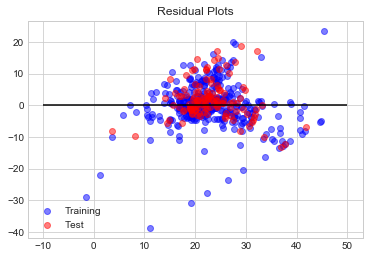

In [43]:
# Scatter plot the training data
train = plt.scatter(pred_train,(pred_train - Y_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test - Y_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

# Labels
# We set the test and train plots as objects so we can make a legend for
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Great! Looks like there aren't any major patterns to be concerned about, it may be interesting to check 
out the line occuring towards the bottom right, but overall the majority of the residuals seem to be 
randomly allocated above and below the horizontal. We could also use seaborn to create these plots:

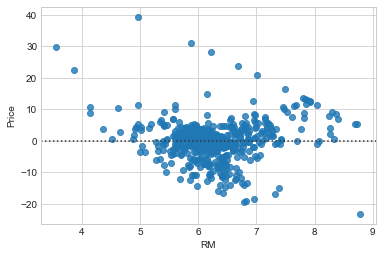

In [69]:
# Residual plot of all the dataset using seaborn
sns.residplot('RM','Price',data=boston_df)

That's it for this lesson. Linear regression is a very broad topic, theres a ton of great information in the sci kit learn documentation, and I encourage you to check it out here: 
http://scikit-learn.org/stable/modules/linear_model.html#linear-model